In [2]:
from PIL import Image

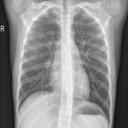

In [3]:
Image.open(r'C:\Users\windows10\Documents\GitHub\X-Ray_Pneumonia\X_ray\chest_xray\test\NORMAL\IM-0003-0001.jpeg')

# Build Data Map

In [4]:
from pathlib import Path
import os
import pandas as pd
from glob import glob

In [5]:
def build_dataframe(folder_path):
    image_paths = glob(folder_path + '/*.jpeg')
    clas = Path(folder_path).name
    split = Path(folder_path).parent.name
    
    return pd.DataFrame({
        'image_path': image_paths,          
        'class': clas,
        'split': split
    })

test_normal = build_dataframe(r'C:\Users\windows10\Documents\GitHub\X-Ray_Pneumonia\X_ray\chest_xray\test\NORMAL')
test_pneumonia = build_dataframe(r'C:\Users\windows10\Documents\GitHub\X-Ray_Pneumonia\X_ray\chest_xray\test\PNEUMONIA')

train_normal = build_dataframe(r'C:\Users\windows10\Documents\GitHub\X-Ray_Pneumonia\X_ray\chest_xray\train\NORMAL')
train_pneumonia = build_dataframe(r'C:\Users\windows10\Documents\GitHub\X-Ray_Pneumonia\X_ray\chest_xray\train\PNEUMONIA')

val_normal = build_dataframe(r'C:\Users\windows10\Documents\GitHub\X-Ray_Pneumonia\X_ray\chest_xray\val\NORMAL')
val_pneumonia = build_dataframe(r"C:\Users\windows10\Documents\GitHub\X-Ray_Pneumonia\X_ray\chest_xray\val\PNEUMONIA")


In [6]:
val_pneumonia

,image_path,class,split
0,C:\Users\windows10\Documents\GitHub\X-Ray_Pneu...,PNEUMONIA,val
1,C:\Users\windows10\Documents\GitHub\X-Ray_Pneu...,PNEUMONIA,val
2,C:\Users\windows10\Documents\GitHub\X-Ray_Pneu...,PNEUMONIA,val
3,C:\Users\windows10\Documents\GitHub\X-Ray_Pneu...,PNEUMONIA,val
4,C:\Users\windows10\Documents\GitHub\X-Ray_Pneu...,PNEUMONIA,val
5,C:\Users\windows10\Documents\GitHub\X-Ray_Pneu...,PNEUMONIA,val
6,C:\Users\windows10\Documents\GitHub\X-Ray_Pneu...,PNEUMONIA,val
7,C:\Users\windows10\Documents\GitHub\X-Ray_Pneu...,PNEUMONIA,val


In [7]:
data = pd.concat([
    test_normal,        
    test_pneumonia,
    train_normal,
    train_pneumonia,
    val_normal,
    val_pneumonia
])

In [8]:
data

,image_path,class,split
0,C:\Users\windows10\Documents\GitHub\X-Ray_Pneu...,NORMAL,test
1,C:\Users\windows10\Documents\GitHub\X-Ray_Pneu...,NORMAL,test
2,C:\Users\windows10\Documents\GitHub\X-Ray_Pneu...,NORMAL,test
3,C:\Users\windows10\Documents\GitHub\X-Ray_Pneu...,NORMAL,test
4,C:\Users\windows10\Documents\GitHub\X-Ray_Pneu...,NORMAL,test
...,...,...,...
3,C:\Users\windows10\Documents\GitHub\X-Ray_Pneu...,PNEUMONIA,val
4,C:\Users\windows10\Documents\GitHub\X-Ray_Pneu...,PNEUMONIA,val
5,C:\Users\windows10\Documents\GitHub\X-Ray_Pneu...,PNEUMONIA,val
6,C:\Users\windows10\Documents\GitHub\X-Ray_Pneu...,PNEUMONIA,val


# ERD

In [9]:
data.shape


(5856, 3)

In [10]:
sample = data.sample(1)
img_path = sample.iloc[0]['image_path']
img = Image.open(img_path)
img.show()
img.size

(128, 128)

In [11]:
WIDTH = 128
HEIGHT = 128

In [13]:
from tqdm import tqdm

for i, row in tqdm(data.iterrows(), total=data.shape[0]):
    img_path = row['image_path']
    img = Image.open(img_path)
    img = img.resize((WIDTH, HEIGHT))
    img.save(img_path)

100%|██████████| 5856/5856 [01:37<00:00, 59.90it/s]


In [14]:
data.shape

(5856, 3)

In [16]:
data.head()

,image_path,class,split
0,C:\Users\windows10\Documents\GitHub\X-Ray_Pneu...,NORMAL,test
1,C:\Users\windows10\Documents\GitHub\X-Ray_Pneu...,NORMAL,test
2,C:\Users\windows10\Documents\GitHub\X-Ray_Pneu...,NORMAL,test
3,C:\Users\windows10\Documents\GitHub\X-Ray_Pneu...,NORMAL,test
4,C:\Users\windows10\Documents\GitHub\X-Ray_Pneu...,NORMAL,test


In [18]:
data.to_csv(r'C:\Users\windows10\Documents\GitHub\X-Ray_Pneumonia\data_map.csv', index=False)